<a href="https://colab.research.google.com/github/SSevgi/Mass-Models-Implemantations/blob/main/reduced_mass_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

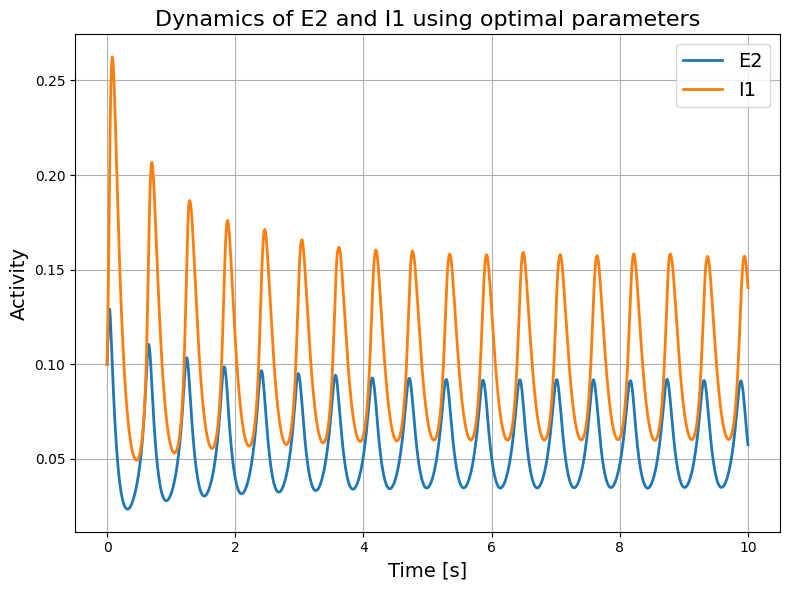

In [19]:
#PROPOSING EQUIVALENT REDUCED MASS MODEL

#To determine the coefficients that induce oscillations in the reduced mass model, 
#the classical Wilson-Cowan equations were initially considered using the 
#coefficients from the Wilson-Cowan 1971 paper, known to generate oscillatory behavior.

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

#constants 
tau_e = 0.1
tau_i = 0.1

c1 = 28
c2 = 14
c3 = 28
c4 = 2

k = 1
r = 3

ae = 1.2
ai = 1

theta_e = 2.8
theta_i = 4

def sigmoid_e(x, theta_e):
    return 1 / (1 + np.exp(-ae*(x - theta_e)))

def sigmoid_i(x, theta_i):
    return 1 / (1 + np.exp(-ai*(x - theta_i)))

# To ensure oscillations, a change was made to the main Wilson-Cowan equation by replacing the -r coefficient with +r

def system_of_equations(t, y):
    E2, I1 = y
    dE2dt = (-E2 + (k + r * E2) * sigmoid_e(c1 * E2 - c2 * I1, theta_e)) * (1 / tau_e)
    dI1dt = (-I1 + (k + r * I1) * sigmoid_i(c3 * E2 - c4 * I1, theta_i)) * (1 / tau_i)

    return [dE2dt, dI1dt]

time = np.linspace(0, 10, 1000)
initial_conditions = [0.1, 0.1]

solution = solve_ivp(system_of_equations, (time[0], time[-1]), initial_conditions, t_eval=time)

fig, ax1 = plt.subplots(1, 1, figsize=(8, 6))

ax1.plot(solution.t, solution.y[0], label="E2", linewidth=2)
ax1.plot(solution.t, solution.y[1], label="I1", linewidth=2)
ax1.set_xlabel("Time [s]", fontsize=14)
ax1.set_ylabel("Activity", fontsize=14)
ax1.legend(fontsize=14)
ax1.set_title("Dynamics of E2 and I1 using optimal parameters", fontsize=16)
ax1.grid()

plt.tight_layout()
plt.show()


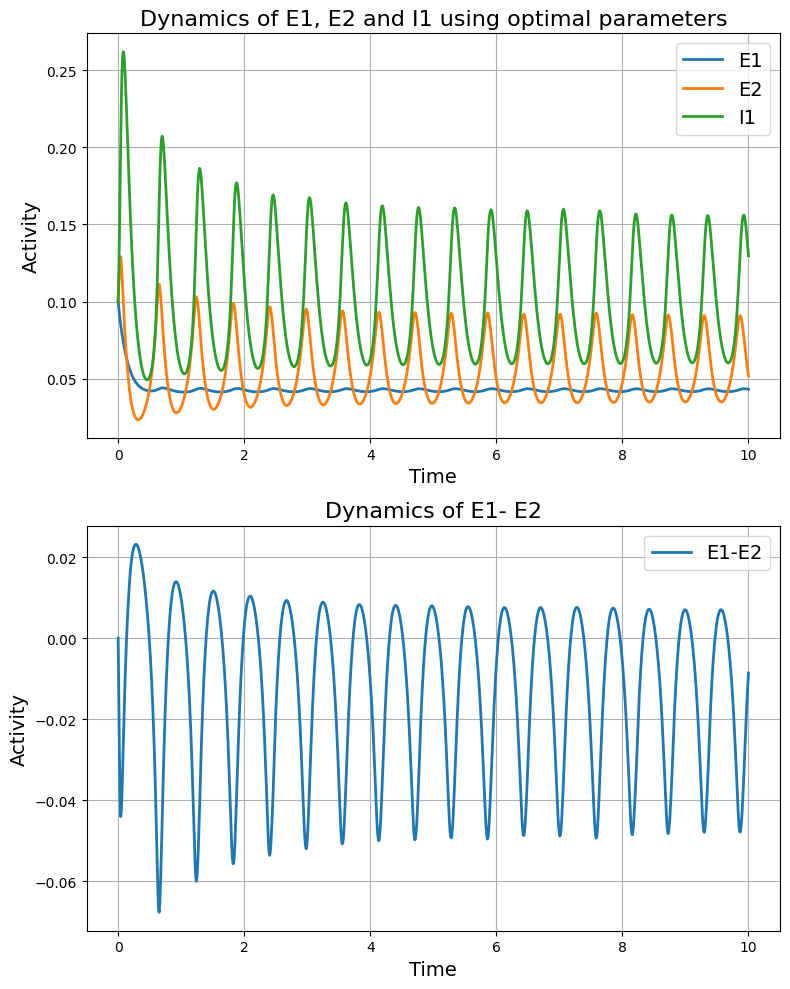

In [20]:
# Then third equation was added (E1) without coefficients.

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

tau_e = 0.1
tau_i = 0.1
c1 = 28
c2 = 14
c3 = 28
c4 = 2

k = 1
r = 3

ae = 1.2
ai = 1
theta_e = 2.8
theta_i = 4


def sigmoid_e(x, theta_e):
    return 1 / (1 + np.exp(-ae*(x - theta_e)))

def sigmoid_i(x, theta_i):
    return 1 / (1 + np.exp(-ai*(x - theta_i)))

def system_of_equations(t, y):
    E1,E2, I1 = y
    
    dE1dt = (-E1 + (k + r * E1) * sigmoid_e(E1 + E2, theta_e))*(1 / tau_e)
    dE2dt = (-E2 + (k + r * E2) * sigmoid_e(c1 * E2 - c2 * I1, theta_e)) * (1 / tau_e)
    dI1dt = (-I1 + (k + r * I1) * sigmoid_i(c3 * E2 - c4 * I1, theta_i)) * (1 / tau_i)

    return [dE1dt, dE2dt, dI1dt]

time = np.linspace(0, 10, 1000)
initial_conditions = [0.1, 0.1, 0.1]

solution = solve_ivp(system_of_equations, (time[0], time[-1]), initial_conditions, t_eval=time)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

ax1.plot(solution.t, solution.y[0], label="E1", linewidth=2)
ax1.plot(solution.t, solution.y[1], label="E2", linewidth=2)
ax1.plot(solution.t, solution.y[2], label="I1", linewidth=2)
ax1.set_xlabel("Time", fontsize=14)
ax1.set_ylabel("Activity", fontsize=14)
ax1.legend(fontsize=14)
ax1.set_title("Dynamics of E1, E2 and I1 using optimal parameters", fontsize=16)
ax1.grid()

ax2.plot(solution.t, solution.y[0]- solution.y[1], label="E1-E2", linewidth=2)
ax2.set_xlabel("Time", fontsize=14)
ax2.set_ylabel("Activity", fontsize=14)
ax2.legend(fontsize=14)
ax2.set_title("Dynamics of E1- E2", fontsize=16)
ax2.grid()

plt.tight_layout()
plt.show()


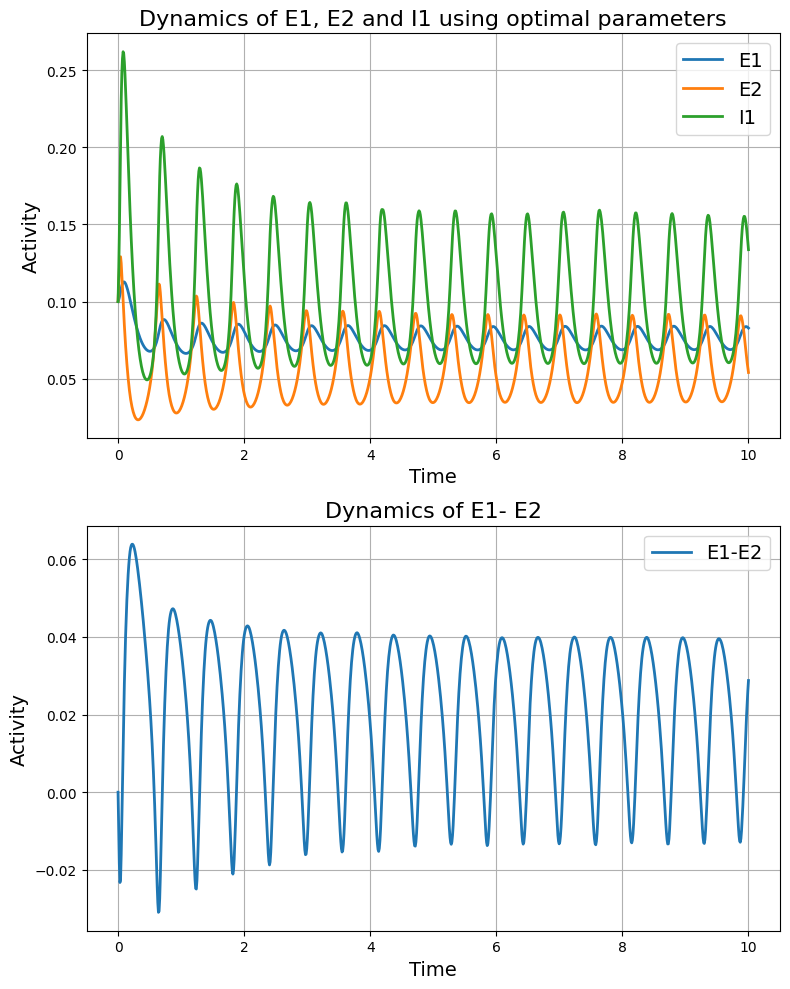

In [21]:
#Afterwards, the values of the coefficients c5 and c6, which represent the 
#influence of the E1 population on the other populations, were determined. 
#To preserve the oscillatory characteristic without disrupting the oscillations, the maximum values of c5 and c6, which do not disturb the oscillations, were selected.

#ekleme yapılmıs hali c5 ve c6 katsaylıarı da 
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

tau_e = 0.1
tau_i = 0.1
c1 = 28
c2 = 14
c3 = 28
c4 = 2
c5=4
c6=4


k = 1
r = 3

ae = 1.2
ai = 1
theta_e = 2.8
theta_i = 4


def sigmoid_e(x, theta_e):
    return 1 / (1 + np.exp(-ae*(x - theta_e)))

def sigmoid_i(x, theta_i):
    return 1 / (1 + np.exp(-ai*(x - theta_i)))

def system_of_equations(t, y):
    E1,E2, I1 = y
    
    dE1dt = (-E1 + (k + r * E1) * sigmoid_e(c5 * E1 + c6 * E2, theta_e))*(1 / tau_e)
    dE2dt = (-E2 + (k + r * E2) * sigmoid_e(c1 * E2 - c2 * I1, theta_e)) * (1 / tau_e)
    dI1dt = (-I1 + (k + r * I1) * sigmoid_i(c3 * E2 - c4 * I1, theta_i)) * (1 / tau_i)

    return [dE1dt, dE2dt, dI1dt]

time = np.linspace(0, 10, 1000)
initial_conditions = [0.1, 0.1, 0.1]

solution = solve_ivp(system_of_equations, (time[0], time[-1]), initial_conditions, t_eval=time)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

ax1.plot(solution.t, solution.y[0], label="E1", linewidth=2)
ax1.plot(solution.t, solution.y[1], label="E2", linewidth=2)
ax1.plot(solution.t, solution.y[2], label="I1", linewidth=2)
ax1.set_xlabel("Time", fontsize=14)
ax1.set_ylabel("Activity", fontsize=14)
ax1.legend(fontsize=14)
ax1.set_title("Dynamics of E1, E2 and I1 using optimal parameters", fontsize=16)
ax1.grid()

ax2.plot(solution.t, solution.y[0]- solution.y[1], label="E1-E2", linewidth=2)
ax2.set_xlabel("Time", fontsize=14)
ax2.set_ylabel("Activity", fontsize=14)
ax2.legend(fontsize=14)
ax2.set_title("Dynamics of E1- E2", fontsize=16)
ax2.grid()

plt.tight_layout()
plt.show()


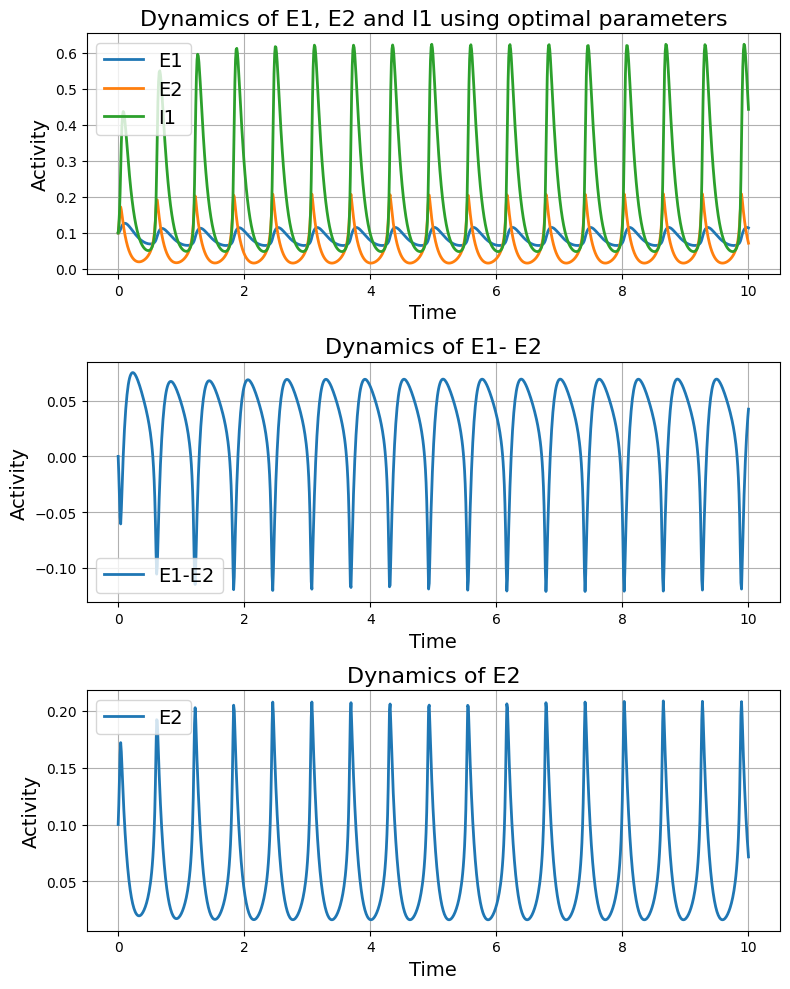

In [22]:
#Then to establish Jansen- Rit connections, the connection from E1 to E2 has been added, thereby interconnecting the three populations.
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

tau_e = 0.1
tau_i = 0.1
c1 = 28
c2 = 14
c3 = 28
c4 = 2

k=1
r=3

ae = 1.2
ai = 1
theta_e = 2.8
theta_i = 4

# Maximum value of c7 connection was determined without changing oscillation behaviour
c7 =2

def sigmoid_e(x, theta_e):
    return 1 / (1 + np.exp(-ae*(x - theta_e)))

def sigmoid_i(x, theta_i):
    return 1 / (1 + np.exp(-ai*(x - theta_i)))

def system_of_equations(t, y):
    E1,E2, I1 = y
    
    dE1dt = (-E1 + (ke1 + re1 * E1) * sigmoid_e(c5 * E1 + c6 * E2, theta_e))*(1 / tau_e)
    dE2dt = (-E2 + (ke2 + re2 * E2) * sigmoid_e(c7*E1+c1 * E2 - c2 * I1, theta_e)) * (1 / tau_e)
    dI1dt = (-I1 + (ki1 + ri1 * I1) * sigmoid_i(c3 * E2 - c4 * I1, theta_i)) * (1 / tau_i)

    return [dE1dt, dE2dt, dI1dt]

time = np.linspace(0, 10, 1000)
initial_conditions = [0.1, 0.1, 0.1]

solution = solve_ivp(system_of_equations, (time[0], time[-1]), initial_conditions, t_eval=time)

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 10))

ax1.plot(solution.t, solution.y[0], label="E1", linewidth=2)
ax1.plot(solution.t, solution.y[1], label="E2", linewidth=2)
ax1.plot(solution.t, solution.y[2], label="I1", linewidth=2)
ax1.set_xlabel("Time", fontsize=14)
ax1.set_ylabel("Activity", fontsize=14)
ax1.legend(fontsize=14)
ax1.set_title("Dynamics of E1, E2 and I1 using optimal parameters", fontsize=16)
ax1.grid()

ax2.plot(solution.t, solution.y[0]- solution.y[1], label="E1-E2", linewidth=2)
ax2.set_xlabel("Time", fontsize=14)
ax2.set_ylabel("Activity", fontsize=14)
ax2.legend(fontsize=14)
ax2.set_title("Dynamics of E1- E2", fontsize=16)
ax2.grid()

ax3.plot(solution.t, solution.y[1], label="E2", linewidth=2)
ax3.set_xlabel("Time", fontsize=14)
ax3.set_ylabel("Activity", fontsize=14)
ax3.legend(fontsize=14)
ax3.set_title("Dynamics of E2",  fontsize=16)
ax3.grid()

plt.tight_layout()
plt.show()


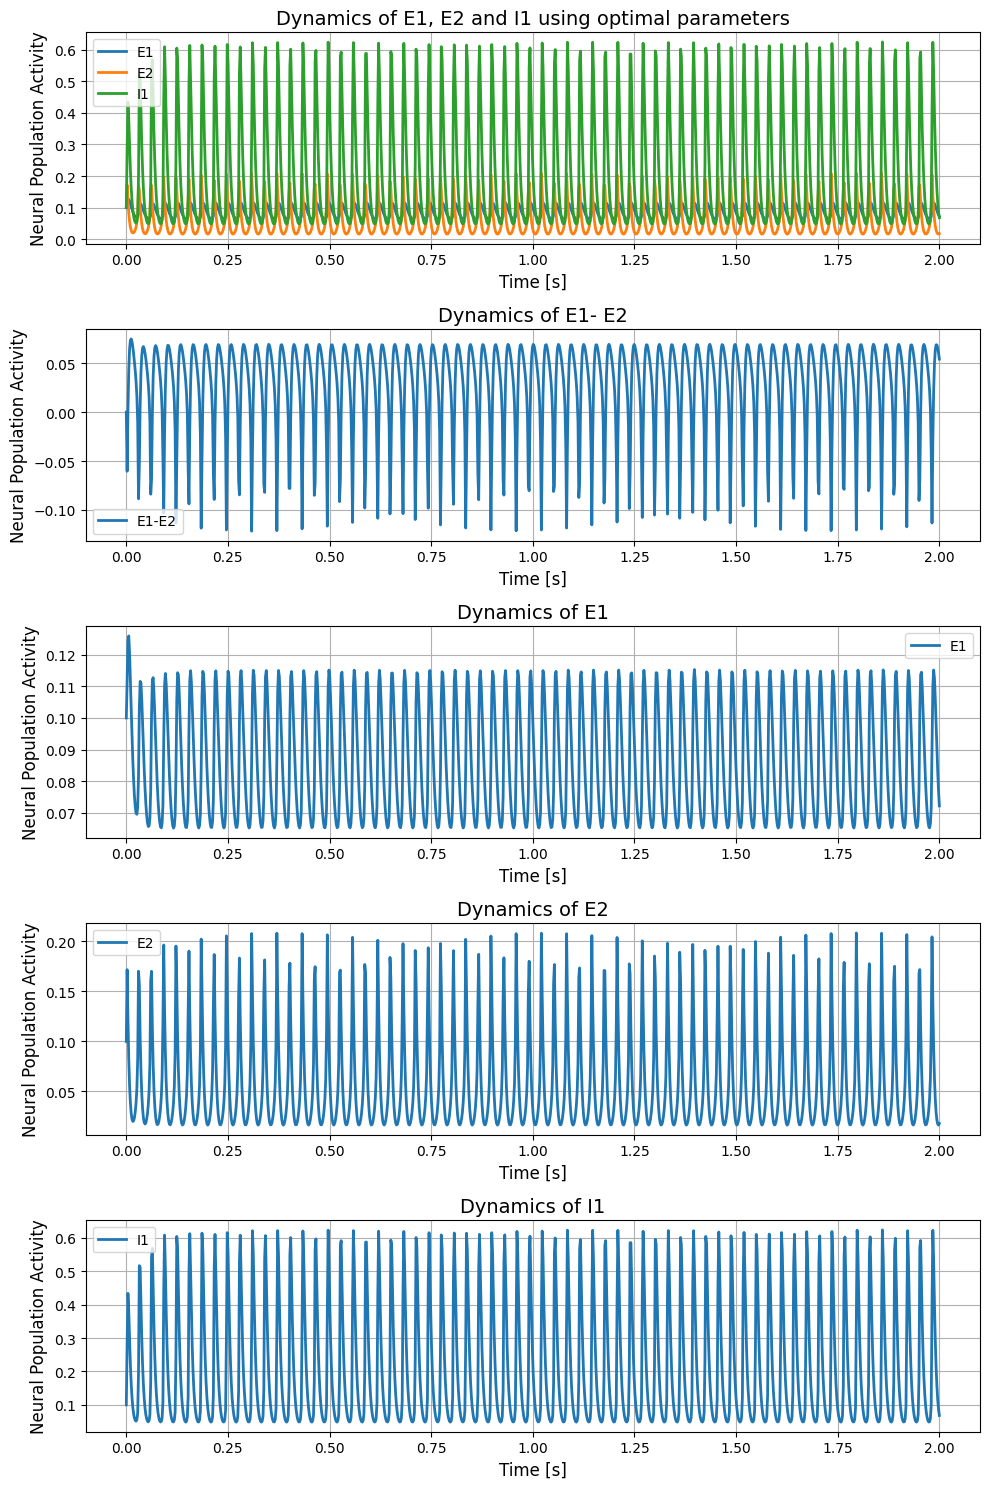

In [23]:
#At the end, optimal constants were determined and arranged

ae = 1.2
ai = 1
theta_e = 2.8
theta_i = 4

k = 1
r = 3

c22 = 28
c32 = 14
c23 = 28
c33 = 2
c11 = 4
c21 = 4
c12= 2

#constanst for frequency
#with changing tau_e and tau_i parameters different frequency bands were created to obtain different brain dynamics (alpha, beta etc.)
tau_e = 0.005
tau_i = tau_e


def sigmoid_e(x, theta_e):
    return 1 / (1 + np.exp(-ae*(x - theta_e)))

def sigmoid_i(x, theta_i):
    return 1 / (1 + np.exp(-ai*(x - theta_i)))

def system_of_equations(t, y):
    E1,E2, I1 = y
    
    dE1dt = (-E1 + (k + r * E1) * sigmoid_e( c11 * E1 + c21 * E2, theta_e ))*(1 / tau_e)
    dE2dt = (-E2 + (k + r * E2) * sigmoid_e( c22 * E2 + c12 * E1 - c32 * I1, theta_e )) * (1 / tau_e)
    dI1dt = (-I1 + (k + r * I1) * sigmoid_i( - c33 * I1 + c23 * E2, theta_i )) * (1 / tau_i)

    return [dE1dt, dE2dt, dI1dt]

time = np.linspace(0, 2, 1000)
initial_conditions = [0.1, 0.1, 0.1]

solution = solve_ivp(system_of_equations, (time[0], time[-1]), initial_conditions, t_eval=time)

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(10, 15))

ax1.plot(solution.t, solution.y[0], label="E1", linewidth=2)
ax1.plot(solution.t, solution.y[1], label="E2", linewidth=2)
ax1.plot(solution.t, solution.y[2], label="I1", linewidth=2)
ax1.set_xlabel("Time [s]", fontsize=12)
ax1.set_ylabel("Neural Population Activity", fontsize=12)
ax1.legend(fontsize=10)
ax1.set_title("Dynamics of E1, E2 and I1 using optimal parameters", fontsize=14)
ax1.grid()

ax2.plot(solution.t, solution.y[0]- solution.y[1], label="E1-E2", linewidth=2)
ax2.set_xlabel("Time [s]", fontsize=12)
ax2.set_ylabel("Neural Population Activity", fontsize=12)
ax2.legend(fontsize=10)
ax2.set_title("Dynamics of E1- E2", fontsize=14)
ax2.grid()

ax3.plot(solution.t, solution.y[0], label="E1", linewidth=2)
ax3.set_xlabel("Time [s]", fontsize=12)
ax3.set_ylabel("Neural Population Activity", fontsize=12)
ax3.legend(fontsize=10)
ax3.set_title("Dynamics of E1",  fontsize=14)
ax3.grid()

ax4.plot(solution.t, solution.y[1], label="E2", linewidth=2)
ax4.set_xlabel("Time [s]", fontsize=12)
ax4.set_ylabel("Neural Population Activity", fontsize=12)
ax4.legend(fontsize=10)
ax4.set_title("Dynamics of E2",  fontsize=14)
ax4.grid()

ax5.plot(solution.t, solution.y[2], label="I1", linewidth=2)
ax5.set_xlabel("Time [s]", fontsize=12)
ax5.set_ylabel("Neural Population Activity", fontsize=12)
ax5.legend(fontsize=10)
ax5.set_title("Dynamics of I1",  fontsize=14)
ax5.grid()


plt.tight_layout()
plt.show()


In [18]:
#finding eigenvalues

from scipy.optimize import fsolve
tau_e = 0.1
tau_i = 0.1
c11 = 4
c21 = 4
c22 = 28
c12 = 2

k = 1

r = 3

ae = 1.2
ai = 1
theta_e = 2.8
theta_i = 4


#benim eklediğim
c32=14
c23=28


#EN KUCUKTEN BUYUGE
c33=2
def sigmoid_e(x, theta_e):
    return 1 / (1 + np.exp(-ae * (x - theta_e)))

def sigmoid_i(x, theta_i):
    return 1 / (1 + np.exp(-ai * (x - theta_i)))


def equilibrium(E, tau_e, tau_i, ae, ai, theta_e, theta_i, k, r, c11, c21, c12, c22, c32, c23, c33):
    E1, E2, I1 = E

    dE1dt = (-E1 + (k + r * E1) * sigmoid_e(c11 * E1 + c21 * E2, theta_e)) * (1 / tau_e)
    dE2dt = (-E2 + (k + r * E2) * sigmoid_e(c22 * E2 + c12 * E1 - c32 * I1, theta_e)) * (1 / tau_e)
    dI1dt = (-I1 + (k + r * I1) * sigmoid_i(-c33 * I1 + c23 * E2, theta_i)) * (1 / tau_i)

    return [dE1dt, dE2dt, dI1dt]

# Initial guess for equilibrium points
E_guess = [0.01, 0.01, 0.01]

# Solve for equilibrium points
E_eq = fsolve(equilibrium, E_guess, args=(tau_e, tau_i, ae, ai, theta_e, theta_i, k, r, c11, c21, c12, c22, c32, c23, c33))
print("Equilibrium points: E1 =", E_eq[0], ", E2 =", E_eq[1], ", I1 =", E_eq[2])





Equilibrium points: E1 = 0.08223859094671057 , E2 = 0.06559415358772669 , I1 = 0.11243295044130575


In [4]:
#finding eigenvalues

import numpy as np
from scipy.optimize import differential_evolution
from scipy.linalg import eigvals

#def sigmoid_e(x, theta_e):
#    return 1 / (1 + np.exp(x - theta_e))

#def sigmoid_i(x, theta_i):
#    return 1 / (1 + np.exp(x - theta_i))

tau_e = 0.1
tau_i = 0.1
c11 = 4
c21 = 4
c22 = 28
c12 = 2

ke2 = 1
ki1 = 1

re2 = 3
ri1 = 3
ae = 1.2
ai = 1
theta_e = 2.8
theta_i = 4


#benim eklediğim
c32=14
c23=28
ke1 = 1
re1 = 3

#EN KUCUKTEN BUYUGE
c33=2

def jacobian_matrix(params):
    ke1, ke2, ki1, re1, re2, ri1, ae, ai,  c11, c21, c22, c12, c32, c23, c33, theta_e, theta_i = params

    E1, E2, I1 = 0.08223859093311353, 0.0655941535832882, 0.11243295041071061  #  equilibrium point


    # Calculate the partial derivatives for the Jacobian matrix
    de1_de1 = (re1/(np.exp(- theta_e - ae*(c11*E1 + c21*E2)) + 1) + (c11*ae*np.exp(- theta_e - ae*(c11*E1 + c21*E2))*(ke1 + E1*re1))/(np.exp(- theta_e - ae*(c11*E1 + c21*E2)) + 1)**2 - 1)/tau_e
    de1_de2 = (c21*ae*np.exp(- theta_e - ae*(c11*E1 + c21*E2))*(ke1 + E1*re1))/(tau_e*(np.exp(- theta_e - ae*(c11*E1 + c21*E2)) + 1)**2)
    de1_di1 = 0

    de2_de1 = (c12*ae*np.exp(- theta_e - ae*(c22*E2 + c12*E1 - c32*I1))*(ke2 + E2*re2))/(tau_e*(np.exp(- theta_e - ae*(c22*E2 + c12*E1 - c32*I1)) + 1)**2)
    de2_de2 = (re2/(np.exp(- theta_e - ae*(c22*E2 + c12*E1 - c32*I1)) + 1) + (c22*ae*np.exp(- theta_e - ae*(c22*E2 + c12*E1 - c32*I1))*(ke2 + E2*re2))/(np.exp(- theta_e - ae*(c22*E2 + c12*E1 - c32*I1)) + 1)**2 - 1)/tau_e
    de2_di1 = -(c32*ae*np.exp(- theta_e - ae*(c22*E2 + c12*E1 - c32*I1))*(ke2 + E2*re2))/(tau_e*(np.exp(- theta_e - ae*(c22*E2 + c12*E1 - c32*I1)) + 1)**2)
 
    di1_de1 = 0
    di1_de2 = (c23*ai*np.exp(- theta_i - ai*(c23*E2 - c33*I1))*(ki1 + I1*ri1))/(tau_i*(np.exp(- theta_i - ai*(c23*E2 - c33*I1)) + 1)**2)
    di1_di1 = -((c33*ai*np.exp(- theta_i - ai*(c23*E2 - c33*I1))*(ki1 + I1*ri1))/(np.exp(- theta_i - ai*(c23*E2 - c33*I1)) + 1)**2 - ri1/(np.exp(- theta_i - ai*(c23*E2 - c33*I1)) + 1) + 1)/tau_i

    # Construct the Jacobian matrix
    J = np.array([
        [de1_de1, de1_de2, de1_di1],
        [de2_de1, de2_de2, de2_di1],
        [di1_de1, di1_de2, di1_di1]
    ])

    return J

params = [ke1, ke2, ki1, re1, re2, ri1, ae, ai,  c11, c21, c22, c12, c32, c23, c33, theta_e, theta_i]

# Construct the Jacobian matrix
J = jacobian_matrix(params)

# Find the eigenvalues
eigvals = eigvals(J)

# Extract the eigenvalues for E1, E3, and I1
E1, E2, I1 = eigvals

print("E1:", E1)
print("E2:", E2)
print("I1:", I1)


E1: (31.968401894331446+0j)
E2: (20.61165346265738+0.329930071336431j)
I1: (20.61165346265738-0.329930071336431j)


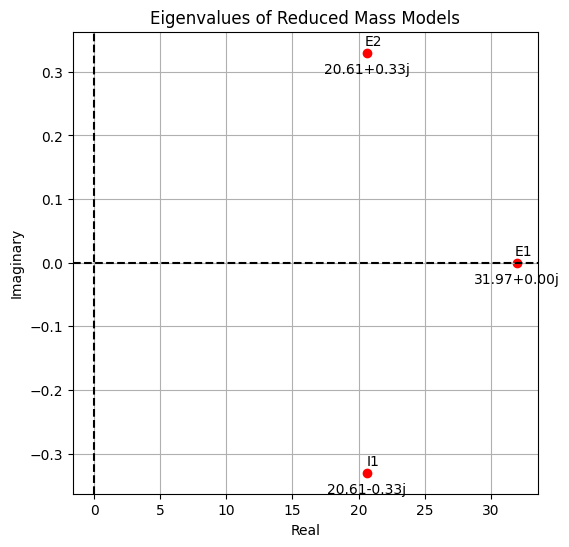

In [5]:
#plotting eigenvalues

import matplotlib.pyplot as plt
import numpy as np

# Eigenvalues
E1 = 31.968401894331446 + 0j
E2 = 20.61165346265738 + 0.329930071336431j
I1 = 20.61165346265738 - 0.329930071336431j

# Extract real and imaginary parts
real_parts = [np.real(E1), np.real(E2), np.real(I1)]
imaginary_parts = [np.imag(E1), np.imag(E2), np.imag(I1)]
labels = ['E1', 'E2', 'I1']
eigenvalues = [E1, E2, I1]

# Plotting
plt.figure(figsize=(6, 6))
plt.scatter(real_parts, imaginary_parts, color='red', marker='o')
plt.axhline(0, color='black', linestyle='dashed')
plt.axvline(0, color='black', linestyle='dashed')

for i, label in enumerate(labels):
    plt.annotate(label, (real_parts[i], imaginary_parts[i]), textcoords="offset points", xytext=(5, 5), ha='center')
    plt.annotate(f"{eigenvalues[i]:.2f}", (real_parts[i], imaginary_parts[i]), textcoords="offset points", xytext=(0, -15), ha='center')


plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.title('Eigenvalues of Reduced Mass Models')
plt.grid(True)
plt.show()

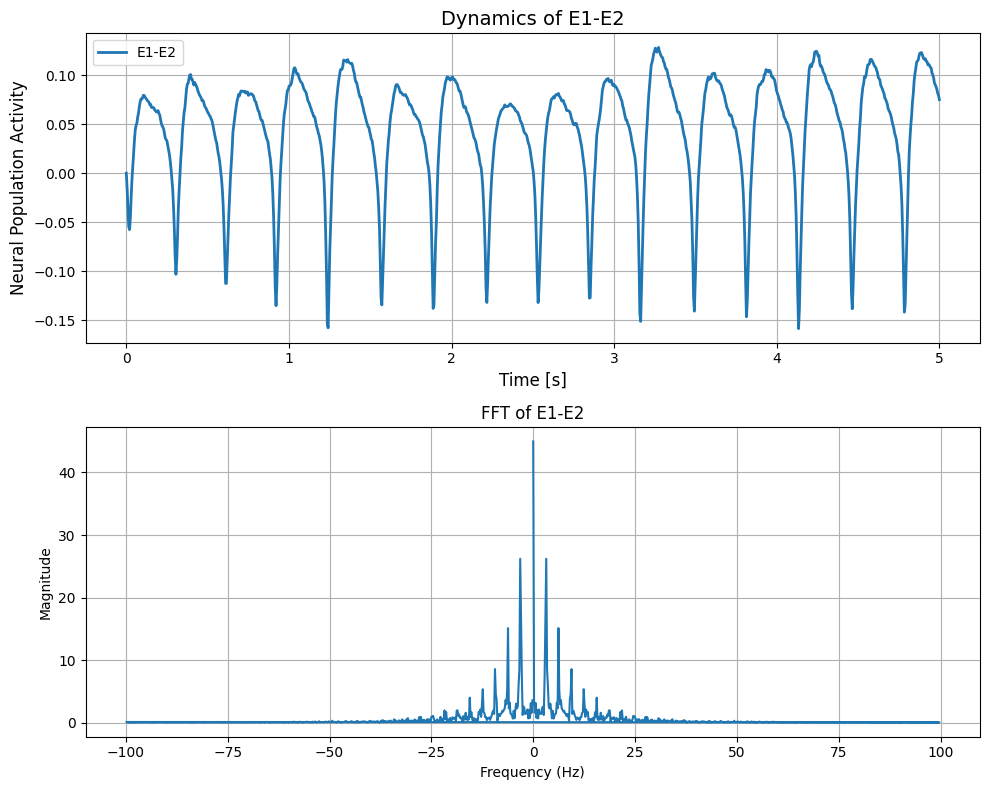

tau_i = 0.05
tau_e = 0.05
max freq = 3.1968


In [3]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Constants for frequency
tau_i = 0.05
tau_e = tau_i

ae = 1.2
ai = 1
theta_e = 2.8
theta_i = 4

k = 1
r = 3

c22 = 28
c32 = 14
c23 = 28
c33 = 2
c11 = 4
c21 = 4
c12 = 2

def sigmoid_e(x, theta_e):
    return 1 / (1 + np.exp(-ae * (x - theta_e)))

def sigmoid_i(x, theta_i):
    return 1 / (1 + np.exp(-ai * (x - theta_i)))

def system_of_equations(t, y):
    E1, E2, I1 = y
    P = 0.01 * np.random.normal(2.2, 22) # 22 mv 0.22 standart sapma ile gürültü

    dE1dt = (-E1 + (k + r * E1) * sigmoid_e(c11 * E1 + c21 * E2 + P, theta_e)) * (1 / tau_e)
    dE2dt = (-E2 + (k + r * E2) * sigmoid_e(c22 * E2 + c12 * E1 - c32 * I1, theta_e)) * (1 / tau_e)
    dI1dt = (-I1 + (k + r * I1) * sigmoid_i(-c33 * I1 + c23 * E2, theta_i)) * (1 / tau_i)

    return [dE1dt, dE2dt, dI1dt]

time = np.linspace(0, 5, 1000)
initial_conditions = [0.1, 0.1, 0.1]

solution = solve_ivp(system_of_equations, (time[0], time[-1]), initial_conditions, t_eval=time)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

ax1.plot(solution.t, solution.y[0] - solution.y[1], label="E1-E2", linewidth=2)
ax1.set_xlabel("Time [s]", fontsize=12)
ax1.set_ylabel("Neural Population Activity", fontsize=12)
ax1.legend(fontsize=10)
ax1.set_title("Dynamics of E1-E2", fontsize=14)
ax1.grid()

#fft calculations belong to Sıla Köksal
e1_minus_e2 = solution.y[0] - solution.y[1]
fft = np.fft.fft(e1_minus_e2)
freq = np.fft.fftfreq(len(e1_minus_e2), d=time[1] - time[0])
magnitude = np.abs(fft)

ax2.plot(freq, magnitude)
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('Magnitude')
ax2.set_title('FFT of E1-E2')
ax2.grid()

plt.tight_layout()
plt.show()

max_freq_idx = np.argmax(np.abs(fft[1:])) + 1  # ignore DC component
print("tau_i =", tau_i)
print("tau_e =", tau_e)
print("max freq =", freq[max_freq_idx])
